# Set up and Preprocessing

In [6]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid")

In [7]:
data = pd.read_excel('fruit_data.xlsx')

In [8]:
# Drop unnecessary columns
data.drop(columns=['Unnamed: 0'], inplace=True)

In [46]:
# Clean categorical data
size_replacements = {'Largee': 'Large'}
color_replacements = {'Yellow1': 'Yellow'}

data['size'].replace(size_replacements, inplace=True)
data['color'].replace(color_replacements, inplace=True)

C:\Users\azama\AppData\Local\Temp\ipykernel_44696\658323982.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['size'].replace(size_replacements, inplace=True)
C:\Users\azama\AppData\Local\Temp\ipykernel_44696\658323982.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [24]:
# Encode categorical variables
le_fruit = LabelEncoder()
le_color = LabelEncoder()
le_size = LabelEncoder()

data['fruit_type_encoded'] = le_fruit.fit_transform(data['fruit_type'])
data['color_encoded'] = le_color.fit_transform(data['color'])
data['size_encoded'] = le_size.fit_transform(data['size'])

In [47]:
# Prepare features (X) and target (y)
X = data[['color_encoded', 'size_encoded', 'weight']]
y = data['fruit_type_encoded']

In [48]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Initialize models
logreg = LogisticRegression(random_state=42)
tree = DecisionTreeClassifier(random_state=42)

In [28]:
# Train the models
logreg.fit(X_train, y_train)
tree.fit(X_train, y_train)

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier(random_state=42)

In [29]:
# Make predictions
y_pred_logreg = logreg.predict(X_test)
y_pred_tree = tree.predict(X_test)

In [31]:
# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    print(f"--- {model_name} Performance ---")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Classification Report:\n{classification_report(y_true, y_pred, target_names=le_fruit.classes_)}")
    print("\n")


evaluate_model(y_test, y_pred_logreg, "Logistic Regression")
evaluate_model(y_test, y_pred_tree, "Decision Tree")

--- Logistic Regression Performance ---
Accuracy: 0.7250
F1 Score: 0.7262
Classification Report:
              precision    recall  f1-score   support

       apple       0.71      0.67      0.69        18
      banana       0.57      0.62      0.59        13
       grape       1.00      1.00      1.00         9

    accuracy                           0.72        40
   macro avg       0.76      0.76      0.76        40
weighted avg       0.73      0.72      0.73        40



--- Decision Tree Performance ---
Accuracy: 0.7500
F1 Score: 0.7500
Classification Report:
              precision    recall  f1-score   support

       apple       0.72      0.72      0.72        18
      banana       0.62      0.62      0.62        13
       grape       1.00      1.00      1.00         9

    accuracy                           0.75        40
   macro avg       0.78      0.78      0.78        40
weighted avg       0.75      0.75      0.75        40





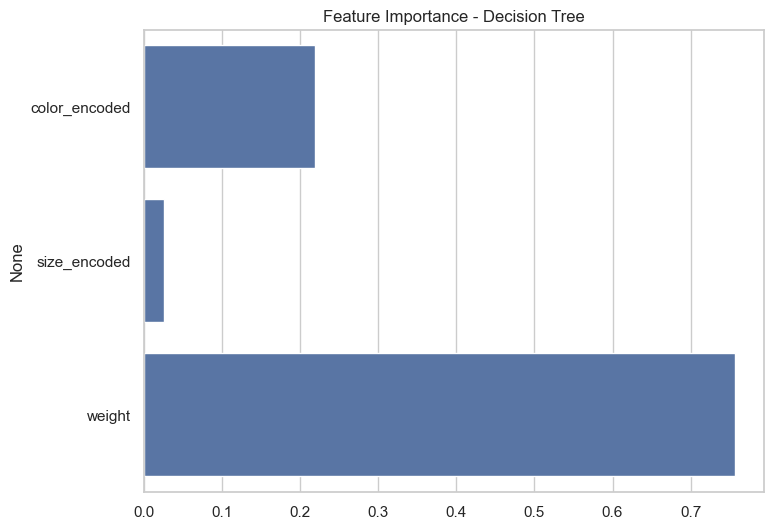

In [32]:
# Plot feature importance for Decision Tree
plt.figure(figsize=(8, 6))
sns.barplot(x=tree.feature_importances_, y=X.columns)
plt.title('Feature Importance - Decision Tree')
plt.show()

# Hyperparameter Tuning

In [50]:
# Define the parameter grid for the Decision Tree
param_grid_expanded = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30, 40, 50],
    'min_impurity_decrease': [0.0, 0.01, 0.1, 0.2],
    'class_weight': [None, 'balanced']
}

In [51]:
# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)

In [52]:
# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
450 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
226 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validat

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=2)

In [53]:
# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_tree = grid_search.best_estimator_

In [54]:
# Print the best parameters
print("Best Parameters for Decision Tree:", best_params)

Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}


In [55]:
# Evaluate the best model on the test data
y_pred_best_tree = best_tree.predict(X_test)
evaluate_model(y_test, y_pred_best_tree, "Optimized Decision Tree")

--- Optimized Decision Tree Performance ---
Accuracy: 0.8000
F1 Score: 0.8013
Classification Report:
              precision    recall  f1-score   support

       apple       0.81      0.72      0.76        18
      banana       0.67      0.77      0.71        13
       grape       1.00      1.00      1.00         9

    accuracy                           0.80        40
   macro avg       0.83      0.83      0.83        40
weighted avg       0.81      0.80      0.80        40





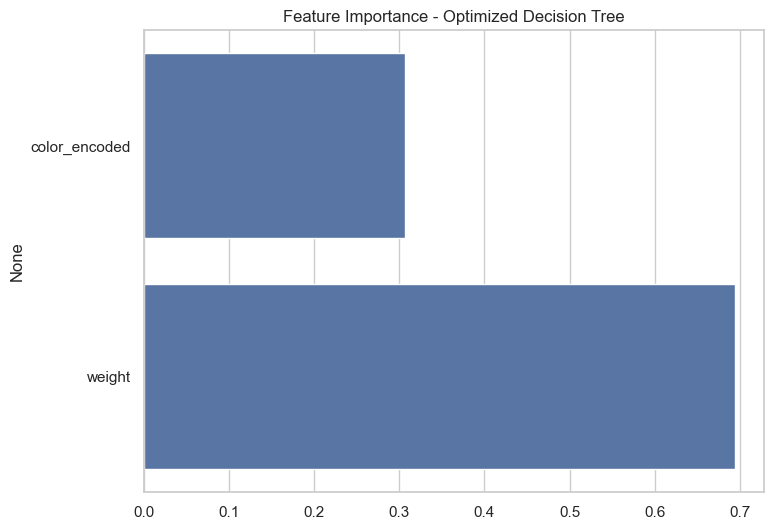

In [56]:
# Plot feature importance for the best model
plt.figure(figsize=(8, 6))
sns.barplot(x=best_tree.feature_importances_, y=X.columns)
plt.title('Feature Importance - Optimized Decision Tree')
plt.show()

# Feature engineering

Cross-Validated Accuracy: 0.8900 ± 0.0339
Fitting 5 folds for each of 34560 candidates, totalling 172800 fits


c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
43200 fits failed out of a total of 172800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
17544 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in v

--- Optimized Decision Tree (Expanded Grid Search) Performance ---
Accuracy: 0.8000
F1 Score: 0.8013
Classification Report:
              precision    recall  f1-score   support

       apple       0.81      0.72      0.76        18
      banana       0.67      0.77      0.71        13
       grape       1.00      1.00      1.00         9

    accuracy                           0.80        40
   macro avg       0.83      0.83      0.83        40
weighted avg       0.81      0.80      0.80        40





c:\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1052: UserWarning: One or more of the test scores are non-finite: [0.9     0.90625 0.9     ... 0.35625 0.35625 0.35625]
  warnings.warn(


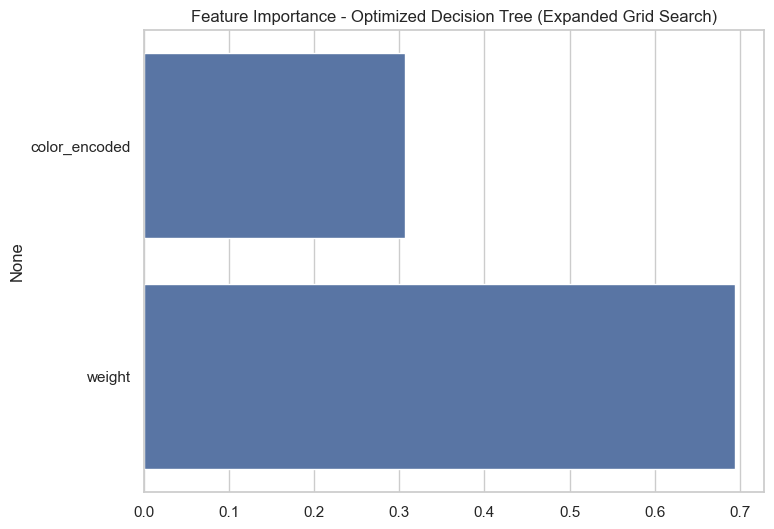

In [58]:
# Cross-validation with the existing Decision Tree model
cv_scores = cross_val_score(tree, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validated Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Expanded Grid Search example for further tuning
param_grid_expanded = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30, 40, 50],
    'min_impurity_decrease': [0.0, 0.01, 0.1, 0.2],
    'class_weight': [None, 'balanced']
}

grid_search_expanded = GridSearchCV(estimator=tree, param_grid=param_grid_expanded, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)
grid_search_expanded.fit(X_train, y_train)

best_tree_expanded = grid_search_expanded.best_estimator_

# Evaluate the optimized model
y_pred_best_tree_expanded = best_tree_expanded.predict(X_test)
evaluate_model(y_test, y_pred_best_tree_expanded, "Optimized Decision Tree (Expanded Grid Search)")

# Plot feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x=best_tree_expanded.feature_importances_, y=X.columns)
plt.title('Feature Importance - Optimized Decision Tree (Expanded Grid Search)')
plt.show()

In [ ]:
# Save the model (if needed)
import joblib
joblib.dump(logreg, 'logistic_regression_model.pkl')
joblib.dump(tree, 'decision_tree_model.pkl')
